<a href="https://colab.research.google.com/github/anshoria/20190140130_Anshori/blob/main/Projek_akhir_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns



from keras import Sequential
from keras import initializers, regularizers, constraints
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [ ]:
df = pd.read_csv('/content/Stress-Lysis.csv')
df

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
...,...,...,...,...
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0


In [ ]:
df['Step count'] = df['Step count'].astype(str).str.lower()

In [ ]:
df=df.drop(['Humidity', 'Temperature'], axis=1)
df=df.dropna()
df

,Step count,Stress Level
0,123,1
1,93,1
2,196,2
3,177,2
4,87,0
...,...,...
1996,96,1
1997,45,0
1998,135,2
1999,64,0


In [1]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["Step count"], df["Stress Level"], shuffle=True, random_state=42,stratify=df["Stress Level"])

print("Training numbers : ", len(X_train))
print("Test Numbers : ", len(X_test))

NameError: name 'df' is not defined

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

preprocessing = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

print("Preprocessing training data...")
train_preprocessed = preprocessing.fit_transform(X_train)

print("Preprocessing test data...")
test_preprocessed = preprocessing.transform(X_test)
cv=CountVectorizer()

word_count_vector=cv.fit_transform(X_train)
featur_names = preprocessing.get_feature_names_out()

Preprocessing training data...
Preprocessing test data...


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

nb_classifier = MultinomialNB()
svm_classifier = LinearSVC()
lr_classifier = LogisticRegression(multi_class="ovr")

print("Training Naive Bayes classifier...")
nb_classifier.fit(train_preprocessed, y_train)

print("Training SVM classifier...")
svm_classifier.fit(train_preprocessed, y_train)

print("Training Logistic Regression classifier...")
lr_classifier.fit(train_preprocessed, y_train)

Training Naive Bayes classifier...
Training SVM classifier...
Training Logistic Regression classifier...


LogisticRegression(multi_class='ovr')

In [ ]:
nb_predictions = nb_classifier.predict(test_preprocessed)
svm_predictions = svm_classifier.predict(test_preprocessed)
lr_predictions = lr_classifier.predict(test_preprocessed)

In [ ]:
print("NB Accuracy:", np.mean(nb_predictions == y_test))
print("SVM Accuracy:", np.mean(svm_predictions == y_test))
print("LR Accuracy:", np.mean(lr_predictions == y_test))

NB Accuracy: 0.6986027944111777
SVM Accuracy: 0.7305389221556886
LR Accuracy: 0.6986027944111777


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(0, 3, 10)}
parameters = {'C': [0.1, 1, 10, 100, 1000]}

print("Grid search for SVM")
svm_best = GridSearchCV(svm_classifier, parameters, cv=3, verbose=1)
svm_best.fit(train_preprocessed,y_train)

print("Grid search for logistic regression")
lr_best = GridSearchCV(lr_classifier, parameters, cv=3, verbose=1)
lr_best.fit(train_preprocessed, y_train)

Grid search for SVM
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

Grid search for logistic regression
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

GridSearchCV(cv=3, estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, verbose=1)

In [ ]:
print("Best SVM Parameters")
print(svm_best.best_params_)

print("Best LR parameters:")
print(lr_best.best_params_)

Best SVM Parameters
{'C': 1000}
Best LR parameters:
{'C': 100}


In [ ]:
best_svm_predictions = svm_best.predict(test_preprocessed)
best_lr_predictions = lr_best.predict(test_preprocessed)

print("Best SVM Accuracy:", np.mean(best_svm_predictions == y_test))
print("Best LR Accuracy:", np.mean(best_lr_predictions == y_test))

Best SVM Accuracy: 0.7305389221556886
Best LR Accuracy: 0.7305389221556886


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, best_svm_predictions, target_names=["0","1", "2"]))

              precision    recall  f1-score   support

           0       0.43      0.23      0.30       125
           1       0.62      0.80      0.70       198
           2       1.00      1.00      1.00       178

    accuracy                           0.73       501
   macro avg       0.68      0.68      0.67       501
weighted avg       0.71      0.73      0.71       501



(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

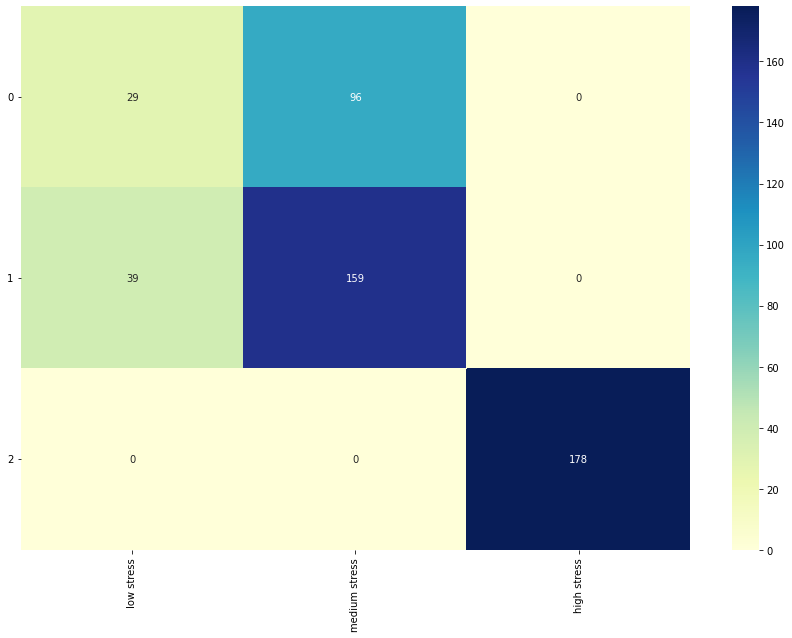

In [ ]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, best_svm_predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=["0","1", "2"], columns=["low stress","medium stress", "high stress"])

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)


In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5

eli5.explain_weights(svm_best.best_estimator_,
                     feature_names = preprocessing.named_steps["vect"].get_feature_names(),
                     target_names = ["low stress","medium stress", "high stress"]
                    )

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Explanation(estimator='LinearSVC(C=1000)', description="\nFeatures with largest coefficients per class.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='low stress', feature_weights=FeatureWeights(pos=[], neg=[FeatureWeight(feature='155', weight=-1.8408320060381542, std=None, value=None), FeatureWeight(feature='104', weight=-1.710812520880145, std=None, value=None), FeatureWeight(feature='160', weight=-1.651735369864172, std=None, value=None), FeatureWeight(feature='102', weight=-1.6152069948709094, std=None, value=None), FeatureWeight(feature='69', weight=-1.6102168758031326, std=None, value=None), FeatureWeight(feature='191', weight=-1.6061560401453385, std=None, value=None), FeatureWeight(feature='108', weight=-1.6026649373199429, std=None, value=None), FeatureWeight(feature='126', weight=-1.5987315512877172, std=None, value=None), FeatureWeight(feature='190', weight=-1.5946055082986, std=None, value=None), FeatureWeight(feature='144', weight=-1.5914631738209968, std=None, value=None), FeatureWeight(feature='176', weight=-1.5799450492086033, std=None, value=None), FeatureWeight(feature='93', weight=-1.5679476390906488, std=None, value=None), FeatureWeight(feature='183', weight=-1.5625161491440946, std=None, value=None), FeatureWeight(feature='159', weight=-1.562438716246966, std=None, value=None), FeatureWeight(feature='180', weight=-1.5491462698037128, std=None, value=None), FeatureWeight(feature='171', weight=-1.5464706669831478, std=None, value=None), FeatureWeight(feature='193', weight=-1.5090654068498701, std=None, value=None), FeatureWeight(feature='164', weight=-1.507054012182033, std=None, value=None), FeatureWeight(feature='141', weight=-1.5052747662690598, std=None, value=None), FeatureWeight(feature='142', weight=-1.4953091922946413, std=None, value=None)], pos_remaining=35, neg_remaining=137), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target='medium stress', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='114', weight=1.8509687372329446, std=None, value=None), FeatureWeight(feature='124', weight=1.61817988125886, std=None, value=None), FeatureWeight(feature='98', weight=1.5862354097358173, std=None, value=None), FeatureWeight(feature='93', weight=1.5743022524137829, std=None, value=None), FeatureWeight(feature='101', weight=1.5425745340952715, std=None, value=None), FeatureWeight(feature='123', weight=1.534083567380291, std=None, value=None), FeatureWeight(feature='95', weight=1.5307813269906976, std=None, value=None), FeatureWeight(feature='108', weight=1.522657946305668, std=None, value=None), FeatureWeight(feature='125', weight=1.513814733010404, std=None, value=None), FeatureWeight(feature='91', weight=1.4920180781305408, std=None, value=None), FeatureWeight(feature='70', weight=1.4875522864120967, std=None, value=None), FeatureWeight(feature='117', weight=1.4165732099076755, std=None, value=None), FeatureWeight(feature='103', weight=1.413506632266567, std=None, value=None), FeatureWeight(feature='104', weight=1.3934231534731123, std=None, value=None), FeatureWeight(feature='111', weight=1.389027472346334, std=None, value=None), FeatureWeight(feature='107', weight=1.3595479452530832, std=None, value=None)], neg=[FeatureWeight(feature='172', weight=-1.5628618625744648, std=None, value=None), FeatureWeight(feature='164', weight=-1.5009609659998637, std=None, value=None), FeatureWeight(feature='149', weight=-1.4557755358263598, std=None, value=None), FeatureWeight(feature='1